# K-Means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df= pd.read_csv("data.csv")

df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
# Drop country column
X = df.drop(columns=["country"])

# Convert to numpy
X = X.to_numpy()

# Standardize (Z-score normalisation)
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)

X_scaled = (X - mean) / std

In [8]:
def kmeans(X, K=3, max_iters=100):
    
    np.random.seed(10)
    
    # Step 1: Randomly initialise centroids
    random_indices = np.random.choice(X.shape[0], K, replace=False)
    centroids = X[random_indices]
    
    for _ in range(max_iters):
        
        # Step 2: Assign clusters
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        cluster_labels = np.argmin(distances, axis=1)
        
        # Step 3: Update centroids
        new_centroids = np.array([
            X[cluster_labels == k].mean(axis=0)
            for k in range(K)
        ])
        
        # Stop if centroids don't change
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return cluster_labels, centroids


In [9]:
labels_kmeans, centroids = kmeans(X_scaled, K=3)
print("K-Means Cluster Labels:", labels_kmeans)
print("K-Means Centroids:", centroids)

K-Means Cluster Labels: [1 2 2 1 2 2 2 0 0 2 2 0 2 2 2 0 2 1 2 2 2 1 2 0 2 1 1 2 1 0 2 1 1 2 2 2 1
 1 1 2 1 2 0 0 0 2 2 2 2 1 1 2 2 0 0 1 1 2 0 1 0 2 2 1 1 2 1 2 0 2 2 2 1 0
 0 0 2 0 2 2 1 1 0 2 1 2 2 1 1 2 2 0 2 1 1 2 2 1 0 1 2 2 2 2 2 2 1 2 1 2 0
 0 1 1 0 2 1 2 2 2 2 2 0 0 2 2 1 2 2 1 2 2 1 0 0 0 2 1 0 0 2 2 1 2 0 0 2 1
 2 1 1 2 2 2 2 1 2 0 0 0 2 2 2 2 2 1 1]
K-Means Centroids: [[-0.82744866  0.64507985  0.72741122  0.19063895  1.48424268 -0.48492064
   1.07957853 -0.79187687  1.61599536]
 [ 1.36021776 -0.43753313 -0.15598401 -0.18920377 -0.68689408  0.40211078
  -1.28217981  1.36494385 -0.60424243]
 [-0.40645337 -0.03165259 -0.2244709   0.02416161 -0.25177041 -0.01716742
   0.25473362 -0.42434279 -0.35448141]]


In [10]:
# Compute covariance
cov = np.cov(X_scaled.T)

eigenvalues, eigenvectors = np.linalg.eig(cov)

# Sort
idx = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, idx]

# Take first 2 components
W = eigenvectors[:, :2]

X_2d = X_scaled @ W


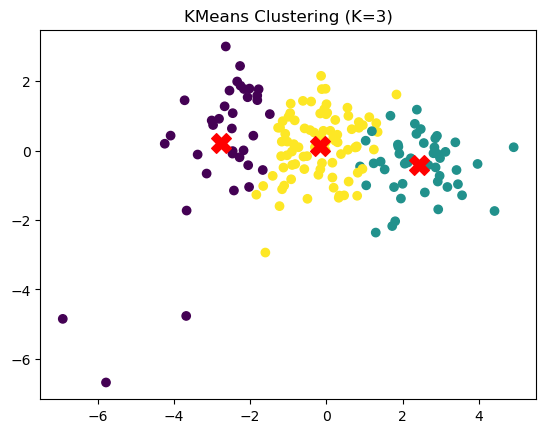

In [11]:
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels_kmeans, cmap='viridis')
plt.scatter((centroids @ W)[:, 0], (centroids @ W)[:, 1],
            c='red', marker='X', s=200)
plt.title("KMeans Clustering (K=3)")
plt.show()


# Hierarchical Clustering

In [12]:
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)


In [17]:
def hierarchical_clustering(X, K):
    
    # Step 1: Start with each point as its own cluster
    clusters = [[i] for i in range(len(X))]
    
    while len(clusters) > K:
        
        min_dist = float("inf")
        merge_idx = (0, 1)
        
        # Step 2: Find closest pair of clusters (complete linkage)
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                
                # Complete linkage: maximum distance between points
                max_pair_dist = 0
                
                for point1 in clusters[i]:
                    for point2 in clusters[j]:
                        dist = np.linalg.norm(X[point1] - X[point2])
                        max_pair_dist = max(max_pair_dist, dist)
                
                if max_pair_dist < min_dist:
                    min_dist = max_pair_dist
                    merge_idx = (i, j)
        
        # Step 3: Merge the closest clusters
        i, j = merge_idx
        clusters[i] = clusters[i] + clusters[j]
        clusters.pop(j)
    
    # Step 4: Assign labels
    labels = np.zeros(len(X))
    
    for cluster_id, cluster in enumerate(clusters):
        for index in cluster:
            labels[index] = cluster_id
    
    return labels


In [18]:
labels_hier = hierarchical_clustering(X_scaled, 3)


In [19]:
print("Hierarchical Clustering Labels:", labels_hier)

Hierarchical Clustering Labels: [0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 2. 1. 0. 0. 1.
 1. 0. 2. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 2. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0.]


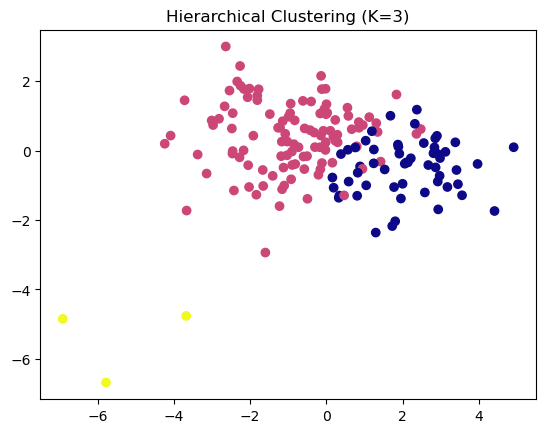

In [20]:
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels_hier, cmap='plasma')
plt.title("Hierarchical Clustering (K=3)")
plt.show()
